# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ps_constructor import PowerSpectrumConstructor

# Initializing the PS constructor

The initializationg of the constructor requires a file containing the linear matter power spectrum (w/ and w/o the wiggles) and the wiggly matter power spectrum. We will teach how to generate it in another file. Here, I will use these products for BOSS high-z

In [2]:
fn = 'BOSS_z1.txt'

In [3]:
ps_model_lin = PowerSpectrumConstructor(fn, 'lin')
ps_model_log = PowerSpectrumConstructor(fn, 'log')
ps_model_none = PowerSpectrumConstructor(fn, 'None')

In [4]:
BNGC = 1
BSGC = 1
sigma_nl = 0
sigma_s = 0
a0 = 0
a1 = 0
a2 = 0
a3 = 0
a4 = 0
alpha = 1
A = 0.1
omega_lin = 200
omega_log = 30
phi = 0.2
params = [BNGC, BSGC, sigma_nl, sigma_s, a0, a1, a2, a3, a4, alpha]

#momentum array
kh_data = np.linspace(1e-3, 0.2, 1000)

Once the parameters are listed, the PF models can be easily accessed:

In [5]:
ps_lin = ps_model_lin.Evaluate_bare(kh_data, params + [A, omega_lin, phi])
ps_log = ps_model_log.Evaluate_bare(kh_data, params + [A, omega_log, phi])
ps_none = ps_model_none.Evaluate_bare(kh_data, params)

In [6]:
data = [x[:len(x)//2] for x in [ps_lin,ps_log,ps_none]]
labels = ['Linear Feature', 'Logarithmic Feature', 'Only BAO']

Linear Feature
Logarithmic Feature
Only BAO


Text(0, 0.5, '$kP(k)$')

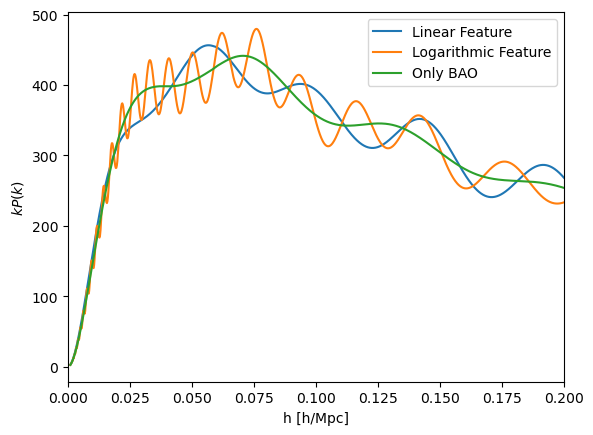

In [7]:
plt.figure()
for x,label in zip(data, labels):
    print(label)
    plt.plot(kh_data, kh_data*x, label = label)
plt.legend()
plt.xlim(0,0.2)
plt.xlabel('h [h/Mpc]')
plt.ylabel(r'$kP(k)$')